<a href="https://colab.research.google.com/github/chan-kh/Music-Sentiment-Analysis/blob/main/LSTM_2outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import os
import datetime
from google.colab import drive

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from pandas import DataFrame

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Bidirectional

from math import sqrt
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [50]:
drive.mount("/content/drive")
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment/features_60frames_allsongs.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,song_id,frame_num,zcr,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,spectral_flatness,melspectrogram,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_stft_0,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_cqt_0,chroma_cqt_1,chroma_cqt_2,chroma_cqt_3,chroma_cqt_4,chroma_cqt_5,chroma_cqt_6,chroma_cqt_7,chroma_cqt_8,chroma_cqt_9,chroma_cqt_10,chroma_cqt_11,chroma_cens_0,chroma_cens_1,chroma_cens_2,chroma_cens_3,chroma_cens_4,chroma_cens_5,chroma_cens_6,chroma_cens_7,chroma_cens_8,chroma_cens_9,chroma_cens_10,chroma_cens_11,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,valence,arousal
0,2,0,0.157715,0.000011,5604.262879,3246.069688,9549.975586,18.349374,0.283305,0.000000,-636.134705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.654255,0.699066,0.261531,0.874848,1.000000,0.333313,0.812421,0.488101,0.413135,0.640419,0.671442,0.490904,0.725918,0.250459,0.284098,0.647150,0.349017,0.147453,0.501239,0.074669,0.070883,0.633342,0.184297,0.136420,0.700169,0.030602,0.209675,0.828279,0.124886,0.257948,1.000000,0.071105,0.309559,0.798000,0.076693,0.276441,-0.134078,0.072852,-0.134683,0.086125,0.060471,0.042898,-0.073341,-0.109386
1,2,1,0.051758,0.096817,1443.667160,2057.611806,3036.181641,27.017306,0.003931,1.576688,-120.319748,129.464996,-4.253306,22.214062,8.163963,16.415987,15.152133,7.878392,-6.823561,-0.831550,-7.218902,-4.558928,-1.807601,12.948887,-9.162554,-3.758020,-5.506585,-1.227700,-4.439484,1.684063,0.528904,0.624552,0.263783,0.891966,0.850903,0.331133,1.000000,1.000000,0.408033,0.713866,0.681263,0.480444,0.245905,0.378263,0.278916,0.160639,0.397115,0.147040,0.285743,0.536704,0.072041,0.314144,0.652729,0.144099,0.269362,0.637670,0.218737,0.382769,0.677961,0.263132,0.424450,0.649488,0.317883,0.517798,0.579528,0.282752,-0.088692,0.052331,-0.112961,0.075804,0.041915,0.033029,-0.074661,-0.114942
2,2,2,0.101562,0.096426,2348.097128,2387.006355,4941.870117,22.434103,0.013857,0.152583,-107.915352,76.319107,-14.175928,45.124214,1.209538,7.516734,-5.023264,6.480774,-0.513962,8.108901,-0.198636,-3.022716,2.078595,4.819644,-16.200150,-3.348299,-5.746615,-9.680576,-17.688511,-5.846364,0.190785,0.290683,0.265836,0.206553,0.217986,0.329024,0.491271,0.576434,0.402986,1.000000,0.924618,0.469653,0.706139,0.605435,0.273279,0.307669,0.224213,0.146400,0.107266,0.206321,0.073380,0.222554,0.297425,0.151825,0.408395,0.409732,0.227828,0.563377,0.734764,0.268284,0.755202,1.000000,0.326054,0.528056,0.687259,0.288720,-0.034494,0.031843,-0.070020,0.068549,0.021691,0.023202,-0.074077,-0.116413
3,2,3,0.062500,0.086847,1692.187106,1872.280637,3219.213867,21.295763,0.004178,0.224268,-148.255432,121.565720,-36.703545,33.151939,4.518500,5.197342,-8.610166,4.267920,8.706326,-17.273952,-11.429454,4.515498,-7.324573,4.467141,-13.720921,-3.195490,-3.931114,-7.317858,-15.654930,-15.824336,0.245845,0.300974,0.267710,0.523842,0.578168,0.326966,1.000000,0.842026,0.397746,0.846539,1.000000,0.458391,0.477668,0.673670,0.267148,0.095004,0.189054,0.145584,0.031817,0.101448,0.075003,0.024125,0.114284,0.159790,0.044276,0.137589,0.237066,0.215029,0.300263,0.273559,0.177739,0.341496,0.334054,0.110806,0.207098,0.294537,-0.013095,0.020309,-0.055259,0.034349,0.011610,0.012032,-0.078154,-0.118613
4,2,4,0.120605,0.113167,2632.895857,2453.043616,5329.467773,18.914987,0.025196,1.035493,-71.919838,76.267471,-28.003765,15.988888,4.667567,35.548042,-6.664427,-5.128408,9.827440,-1.635414,-5.240368,-1.569069,-1.458279,7.581460,-16.175152,-6.295955,-9.435411,-3.781498,-8.782184,-7.635081,0.223808,0.355715,0.269517,0.202841,0.376315,0.324933,0.624933,0.684395,0.392219,1.000000,1.000000,0.446547,0.319092,0.

In [51]:
df =df.iloc[np.random.permutation(np.arange(104640).reshape(-1,60)).ravel()]

### With Normalization

In [52]:
# df_train = df[:65880]
# df_val = df[65880:73200]
# df_test = df[73200:104640]

# train_mean = df_train.mean()
# train_std = df_train.std()

# df_train = (df_train - train_mean) / train_std
# df_val = (df_val - train_mean) / train_std
# df_test = (df_test - train_mean) / train_std

In [53]:
# df_std = (df - train_mean) / train_std
# df_std = df_std.melt(var_name='Column', value_name='Normalized')
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(df.keys(), rotation=90)

In [54]:
# #With Normalization
# y = df.loc[:,'valence':'arousal']
# df_train.pop('song_id')
# df_train.pop('frame_num')
# df_train.pop('valence')
# df_train.pop('arousal')

# df_val.pop('song_id')
# df_val.pop('frame_num')
# df_val.pop('valence')
# df_val.pop('arousal')

# df_test.pop('song_id')
# df_test.pop('frame_num')
# df_test.pop('valence')
# df_test.pop('arousal')


In [55]:
# train_X = df_train
# train_X = train_X.to_numpy() 

# val_X = df_val
# val_X = val_X.to_numpy() 

# test_X = df_test
# test_X = test_X.to_numpy()

# train_y = y[:65880]
# train_y = train_y.to_numpy()

# val_y = y[65880:73200]
# val_y = val_y.to_numpy()

# test_y = y[73200:104640]
# test_y = test_y.to_numpy()

In [56]:
# #With Normalization
# train_X = train_X.reshape(1098,60,70)
# train_y = train_y.reshape(1098,60,2)
# val_X = val_X.reshape(122,60,70)
# val_y = val_y.reshape(122,60,2)
# test_X = test_X.reshape(524,60,70)
# test_y = test_y.reshape(524,60,2)

### Without Normalization

In [57]:
# Without Normalization
df.pop('song_id')
df.pop('frame_num')
y = df.loc[:,'valence':'arousal']
# print(y.shape)
y.head()
df.pop('valence')
df.pop('arousal')
features = df.to_numpy()
y = y.to_numpy()
# print(features.shape)
# print(y.shape)

In [58]:
# Without Normalization
features = features.reshape(1744,60,70)
y = y.reshape(1744,60,2)
train_X , train_y = features[0:1098] , y[0:1098]
val_X, val_y = features[1098:1220] , y[1098:1220]
test_X , test_y = features[1220:1744] , y[1220:1744]
print("train_X :" , train_X.shape , "train_y shape:" , train_y.shape)
print("test_X :" , test_X.shape , "test_y shape:" , test_y.shape)
print("val_X :" , val_X.shape , "val_y shape:" , val_y.shape)

train_X : (1098, 60, 70) train_y shape: (1098, 60, 2)
test_X : (524, 60, 70) test_y shape: (524, 60, 2)
val_X : (122, 60, 70) val_y shape: (122, 60, 2)


### Experiment

In [59]:
train_loss = DataFrame()
val_loss = DataFrame()
train_accuracy = DataFrame()
val_accuracy = DataFrame()
# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
# for i in range(5):
model = Sequential()
model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Dropout(0.2))
model.add(Dense(2))
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
history = model.fit(train_X, train_y, epochs=100, validation_data=(val_X, val_y), verbose=2, shuffle=True)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
  

# model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(32,return_sequences=True, input_shape=(60,70))))
# model.add(Bidirectional(LSTM(16,return_sequences=True, input_shape=(60,70))))
# model.add(Bidirectional(LSTM(8,return_sequences=True, input_shape=(60,70))))






Epoch 1/100
35/35 - 2s - loss: 0.1200 - accuracy: 0.5356 - val_loss: 0.0527 - val_accuracy: 0.5572
Epoch 2/100
35/35 - 1s - loss: 0.0605 - accuracy: 0.5768 - val_loss: 0.0469 - val_accuracy: 0.6329
Epoch 3/100
35/35 - 1s - loss: 0.0561 - accuracy: 0.6033 - val_loss: 0.0542 - val_accuracy: 0.5478
Epoch 4/100
35/35 - 1s - loss: 0.0552 - accuracy: 0.5799 - val_loss: 0.0480 - val_accuracy: 0.6199
Epoch 5/100
35/35 - 1s - loss: 0.0487 - accuracy: 0.6181 - val_loss: 0.0462 - val_accuracy: 0.6571
Epoch 6/100
35/35 - 1s - loss: 0.0493 - accuracy: 0.6176 - val_loss: 0.0467 - val_accuracy: 0.6583
Epoch 7/100
35/35 - 1s - loss: 0.0467 - accuracy: 0.6269 - val_loss: 0.0457 - val_accuracy: 0.6720
Epoch 8/100
35/35 - 1s - loss: 0.0460 - accuracy: 0.6324 - val_loss: 0.0560 - val_accuracy: 0.6526
Epoch 9/100
35/35 - 1s - loss: 0.0479 - accuracy: 0.6323 - val_loss: 0.0486 - val_accuracy: 0.6504
Epoch 10/100
35/35 - 1s - loss: 0.0453 - accuracy: 0.6385 - val_loss: 0.0450 - val_accuracy: 0.6755
Epoch 11/

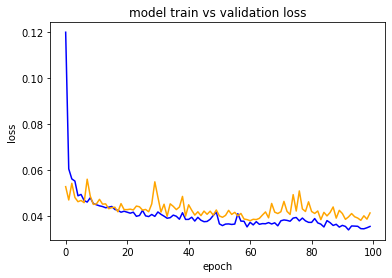

In [60]:
# plot train and validation loss across multiple runs
plt.plot(train_loss, color='blue', label='train')
plt.plot(val_loss, color='orange', label='validation')
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

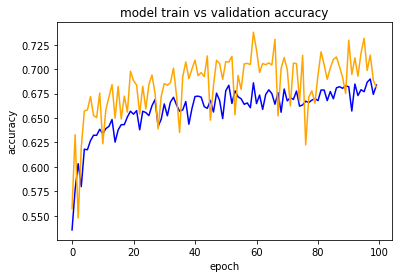

In [61]:
plt.plot(train_accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='orange', label='validation')
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [62]:
# history = model.fit(train_X, train_y, epochs=300, validation_data=(val_X, val_y), verbose=2, shuffle=False)


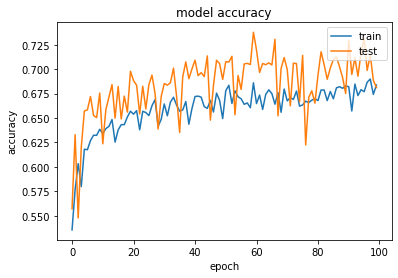

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

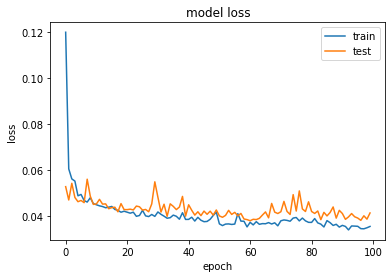

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper right')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [65]:
history.history
print('overall loss' , np.mean(history.history['loss']))
print('overall val_loss' , np.mean(history.history['val_loss']))

overall loss 0.040381791666150094
overall val_loss 0.04290091767907143


In [66]:
predicted_y = model.predict(test_X)


In [67]:
print(predicted_y.shape)
print(test_y.shape)

(524, 60, 2)
(524, 60, 2)


In [68]:
predicted_valence = predicted_y[:,:,0]
predicted_arousal = predicted_y[:,:,1]
test_valence = test_y[:,:,0]
test_arousal = test_y[:,:,1]

In [69]:
# for i in range(1):
  # print(predicted_valence[i])
  # print(predicted_arousal[i])
  # print(test_valence[i])
  # print(test_arousal[i])

In [70]:
predicted_valence = predicted_valence.reshape(31440,)
test_valence = test_valence.reshape(31440,)
predicted_arousal = predicted_arousal.reshape(31440,)
test_arousal = test_arousal.reshape(31440,)

In [71]:
def metrics(y_true,y_pred,name):
  print(name,"")
  mae = mean_absolute_error(y_true,y_pred)
  rmse = sqrt(mean_squared_error(y_true,y_pred))
  r2 = r2_score(y_true,y_pred)
  pearson_corr = pearsonr(y_true,y_pred)
  spearman_corr = spearmanr(y_true,y_pred)
  
  print('RMSE : ',rmse)
  print('Pearson : ',pearson_corr)
  print('MAE : ',mae)
  print('R2 : ',r2)
  print('Spearman : ',spearman_corr,'\n')


In [72]:
def graph_results(x,y,title, xlim=-1, ylim=-1):
  #x and y are variables ( y_pred vs y_true )
  #Important
  plt.scatter(x,y,s=15)

  # if xlim != -1: plt.xlim([0, xlim])
  # if ylim != -1: plt.ylim([0, ylim])
  # plt.gca().set_ylim([1.5,7.5])
  # plt.gca().set_xlim([1.5,9])
  #Fix 
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title((title))
  # m, b = np.polyfit(x, y, 1)
  # plt.plot(x, m*x + b, color='red')  
  plt.savefig(title)

  plt.show()

valence 
RMSE :  0.20136807165001572
Pearson :  (0.5087623639537334, 0.0)
MAE :  0.16017514928634302
R2 :  0.24265704496911322
Spearman :  SpearmanrResult(correlation=0.5064549133221863, pvalue=0.0) 



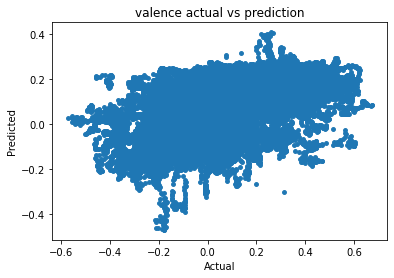

In [73]:
metrics(test_valence,predicted_valence,'valence')
graph_results(test_valence,predicted_valence,'valence actual vs prediction')


arousal 
RMSE :  0.1790129700106895
Pearson :  (0.8030449567029191, 0.0)
MAE :  0.1376050514857606
R2 :  0.6046107132306404
Spearman :  SpearmanrResult(correlation=0.806416251012231, pvalue=0.0) 



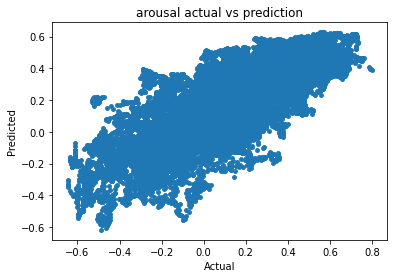

In [74]:
metrics(test_arousal,predicted_arousal,'arousal')
graph_results(test_arousal,predicted_arousal,'arousal actual vs prediction')